# No.6 - The most popular AirBNB cities in Europe
- Group members: Dean Israel, Talya Cuperman , Bnaya Unger and Neta Edri
- The data was taken from: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities
- Credit to  Gyódi, Kristóf and Nawaro, Łukasz for gathering the data
- The data contains bookings of airbnb apartments in every major European city. Each line is an invitation. In each order there is a price and additional features related to the apartment such as location, guest satisfaction rating and more

## Read first! 
### we used libraries which needs to be installed so you need to run all the cells from beginning to end in order to make everything works.

In [1]:
! pip install --quiet ipywidgets
! pip install --quiet folium
import pandas as pd
import numpy as np
import folium
import random
import ipywidgets as widgets
from IPython.display import Image, display, HTML
#FOR CREATING THE PLOTS:
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk
#FOR THE PREDICTION!:
import requests 
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder , MinMaxScaler , OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
url="https://raw.githubusercontent.com/Greenlight5/EDA-project/main/airbnbs%20by%20country.csv"
df=pd.read_csv(url)

## Get to know our data: 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  int64  
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  int64  
 10  guest_satisfaction_overall  51707 non-null  int64  
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

In [4]:
df.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'day', 'country'],
      dtype='object')

- There is unnecessary column('Unnamed') so we going to remove it. 

In [5]:
df=df.drop('Unnamed: 0', axis=1)

- There is a column named country but it contains names of cities, so we need to change its name: 

In [6]:
df=df.rename(columns={'country': 'city'})
df.head(1)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,day,city
0,194.033698,Private room,False,True,2,False,1,0,10,93,...,5.022964,2.53938,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekday,amsterdam


In [7]:
df.shape

(51707, 21)

### Checking if there is null value in each column of our DF:

In [8]:
df.isnull().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
day                           0
city                          0
dtype: int64

there are no null values in the Dataframe 

### Description of the columns (Table of content): 
- **realSum**: the full price of accommodation for two people and two nights in EUR
- **room_type**: the type of the accommodation 
- **room_shared**: dummy variable for shared rooms
- **room_private**: dummy variable for private rooms
- **person_capacity**: the maximum number of guests 
- **host_is_superhost**: dummy variable for superhost status
- **multi**: dummy variable if the listing belongs to hosts with 2-4 offers
- **biz**: dummy variable if the listing belongs to hosts with more than 4 offers
- **cleanliness_rating**: cleanliness rating
- **guest_satisfaction_overall**: overall rating of the listing
- **bedrooms**: number of bedrooms (0 for studios)
- **dist**: distance from city centre in km
- **metro_dist**: distance from nearest metro station in km
- **attr_index**: attraction index of the listing location
- **attr_index_norm**: normalised attraction index (0-100)
- **rest_index**: restaurant index of the listing location
- **attr_index_norm**: normalised restaurant index (0-100)
- **lng**: longitude of the listing location
- **lat**: latitude of the listing location
- **city**: city of the listing location
- **weekend**: data for weekend or weekday. Now it's string variable, let's convert it to dummy variable: 1 for weekend, o for weekday

## Analysis: 

In [9]:
df['Price division Result-per person'] = df['realSum'] / df['person_capacity']
Price_division_df = df.groupby('city')[['Price division Result-per person']].median()
Price_division_df= Price_division_df.sort_values('Price division Result-per person', ascending=False).reset_index() 
Price_division_df

,city,Price division Result-per person
0,amsterdam,184.308579
1,paris,121.632957
2,london,103.365554
3,barcelona,94.258384
4,berlin,78.760400
5,lisbon,68.480300
6,vienna,66.615244
7,rome,57.793468
8,budapest,45.824129
9,athenes,37.094103


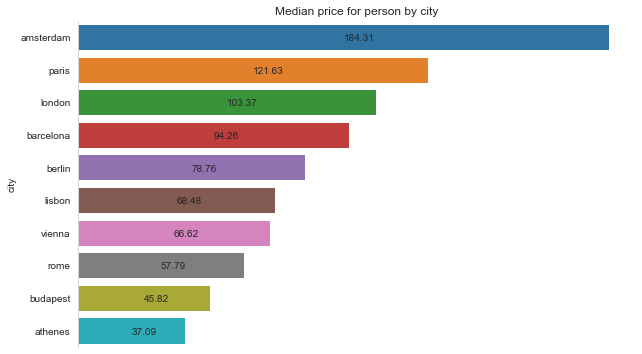

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=Price_division_df, y='city', x='Price division Result-per person')    

# Add values to the bar plot
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    ax.annotate(f'{width:.2f}', (x + width/2, y + height/2), ha='left', va='center_baseline')

ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)  
ax.yaxis.set_tick_params(width=0)
   
plt.title("Median price for person by city")
plt.show()

 - ## Amsterdam is the most expensive city to visit with the price of  184 euro per peson. 

In [11]:
# Create a new column 'distance_category' based on 'dist' values
df['distance_category'] = pd.cut(df['dist'], bins=[0, 2, 10, 25], labels=['close', 'middle', 'far'])
distance_table = df[['distance_category', 'dist','city']]
distance_table

,distance_category,dist,city
0,middle,5.022964,amsterdam
1,close,0.488389,amsterdam
2,middle,5.748312,amsterdam
3,close,0.384862,amsterdam
4,close,0.544738,amsterdam
...,...,...,...
51702,close,0.530181,vienna
51703,close,0.810205,vienna
51704,close,0.994051,vienna
51705,middle,3.044100,vienna


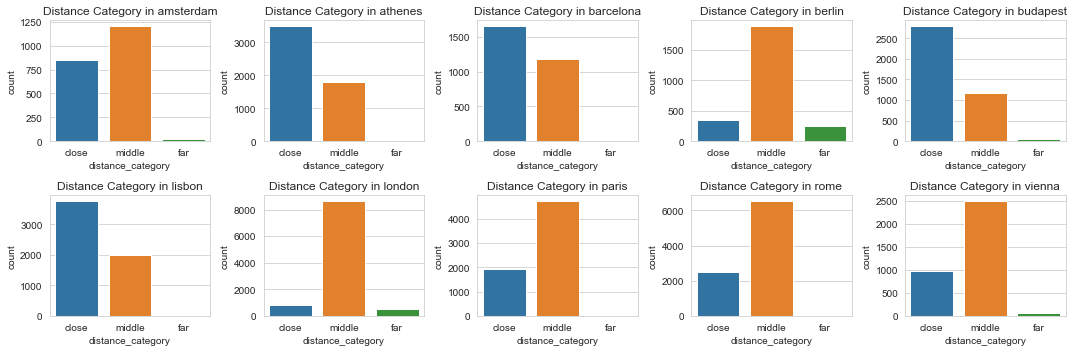

In [42]:
cities = df['city'].unique()
num_rows = 2
num_cols = 5
num_plots = min(len(cities), num_rows * num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
axes = axes.flatten()
for i, city in enumerate(cities[:num_plots]):
    ax = axes[i]  # Get the current subplot
    sns.countplot(data=df[df['city'] == city], x='distance_category', ax=ax)
    ax.set_title(f'Distance Category in {city}')
    
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])
fig.tight_layout()
plt.show()

- from the plots above we can see there is a big gap between the amount of orders in the middle and the amount if orders in the close areas.
- people prefer t book a room in the middle of the cities: Amstersam , London,Paris,Rome and Berlin.
Lets check why it is happene!

In [13]:
dist_table_grouped = df.groupby(['city', 'distance_category'])[['realSum']].median()
dist_table_grouped.fillna(0, inplace = True )
styled_data = dist_table_grouped.style.apply(lambda x: ['background-color: #FF69B4' if any(city in x.name for city in ['paris']) else 'background-color: #A757A8' if 'london' in x.name else 'background-color: plum' if 'berlin' in x.name else 'background-color: pink' if 'amsterdam' in x.name else '' for i in x], axis=1)
styled_data

- You can see from the table that the prices between an apartment that is close to the center and an apartment that is less close to the center are very high.
- Except for Rome. The difference between the prices is very low. We couldn't tell why but we can assume that most AirBNB apartments are not in the city center since there are restrictions on planning and building houses in the center due to the city's desire to preserve the architecture and historic buildings.

## Conclusion 1: 

At the beginning we saw that there is a big gap between the amount of orders in the area close to the center of certain cities. There are more reservations in the middle of the city than in the city center.
We found that the difference exists because of a difference in prices in these areas. In the center, the prices in these cities are very high, which forces the renters to "compromise" for a more distant area. 

In [14]:
dist_table_day = df.groupby(['city','day','distance_category'])[['realSum']].median()
dist_table_day.fillna(0, inplace = True )
dist_table_day

realSum
city      day     distance_category            
amsterdam weekday close              501.370890
                  middle             382.911911
                  far                221.451503
          weekend close              589.834321
                  middle             430.248635
                  far                288.707145
athenes   weekday close              142.478851
                  middle             105.453097
                  far                  0.000000
          weekend close              142.478851
                  middle             105.453097
                  far                  0.000000
barcelona weekday close              223.194545
                  middle             187.353085
                  far                  0.000000
          weekend close              222.030861
                  middle             173.621617
                  far                  0.000000
berlin    weekday close              257.548846
                  middle             185.566047
                  far                155.417407
          weekend close              253.809479
                  middle             192.343648
                  far                150.743199
budapest  weekday close              152.042111
                  middle             134.417446
                  far                119.612727
          weekend close              166.376839
                  middle             140.409832
                  far                104.338018
lisbon    weekday close              236.045966
                  middle             188.086304
                  far                  0.000000
          weekend close              242.729831
                  middle             193.245779
                  far                  0.000000
london    weekday close              494.837602
                  middle             245.772478
                  far                144.876408
          weekend close              498.130248
                  middle             263.882029
                  far                142.289330
paris     weekday close              380.277752
                  middle             293.946314
                  far                  0.000000
          weekend close              382.258365
                  middle             289.868581
                  far                  0.000000
rome      weekday close              180.955275
                  middle             178.851144
                  far                  0.000000
          weekend close              195.917986
                  middle             182.124237
                  far                  0.000000
vienna    weekday close              242.152257
                  middle             190.262487
                  far                149.124652
          weekend close              255.007830
                  middle             196.807143
                  far                149.124652

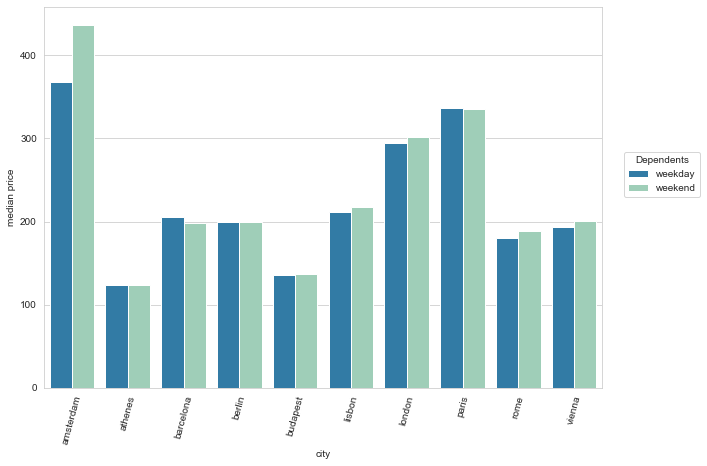

In [15]:
dist_table_day=df.groupby(['city','day','distance_category'])[['realSum']].median().reset_index()
plt.figure(figsize=(10, 7))
plt.xticks(rotation=75)
ax = sns.barplot(data=dist_table_day, y='realSum', x='city', hue='day',ci=None , palette='YlGnBu_r')
ax.set(ylabel='median price')
plt.legend(title='Dependents', loc=(1.04, 0.5))
plt.show()

## Conclusion 2 : 
You can usually think that the prices at the weekend are much higher than the prices in the  weekdays. (This is true when it comes to hotels) but according to the data above you can see that when it comes to AirB&B there is no difference in prices between weekdays and weekends (gap of 10 euros) so if you want to rent an apartment for your vacation and are debating whether on a weekend or in the middle of the week you will know that it doesn't matter!

## polygon: 

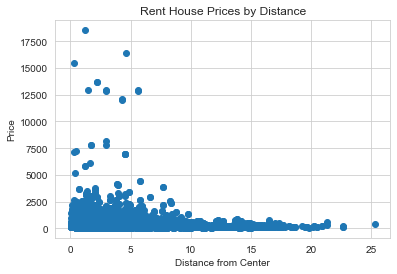

In [16]:
price = df['realSum']
dist = df['dist']
num_people = df['person_capacity']
plt.scatter(dist, price)
plt.xlabel('Distance from Center')
plt.ylabel('Price')
plt.title('Rent House Prices by Distance')
plt.show()

- The closer the apartment is to the city center, the higher the price of the apartment

## Heatmap of DF:

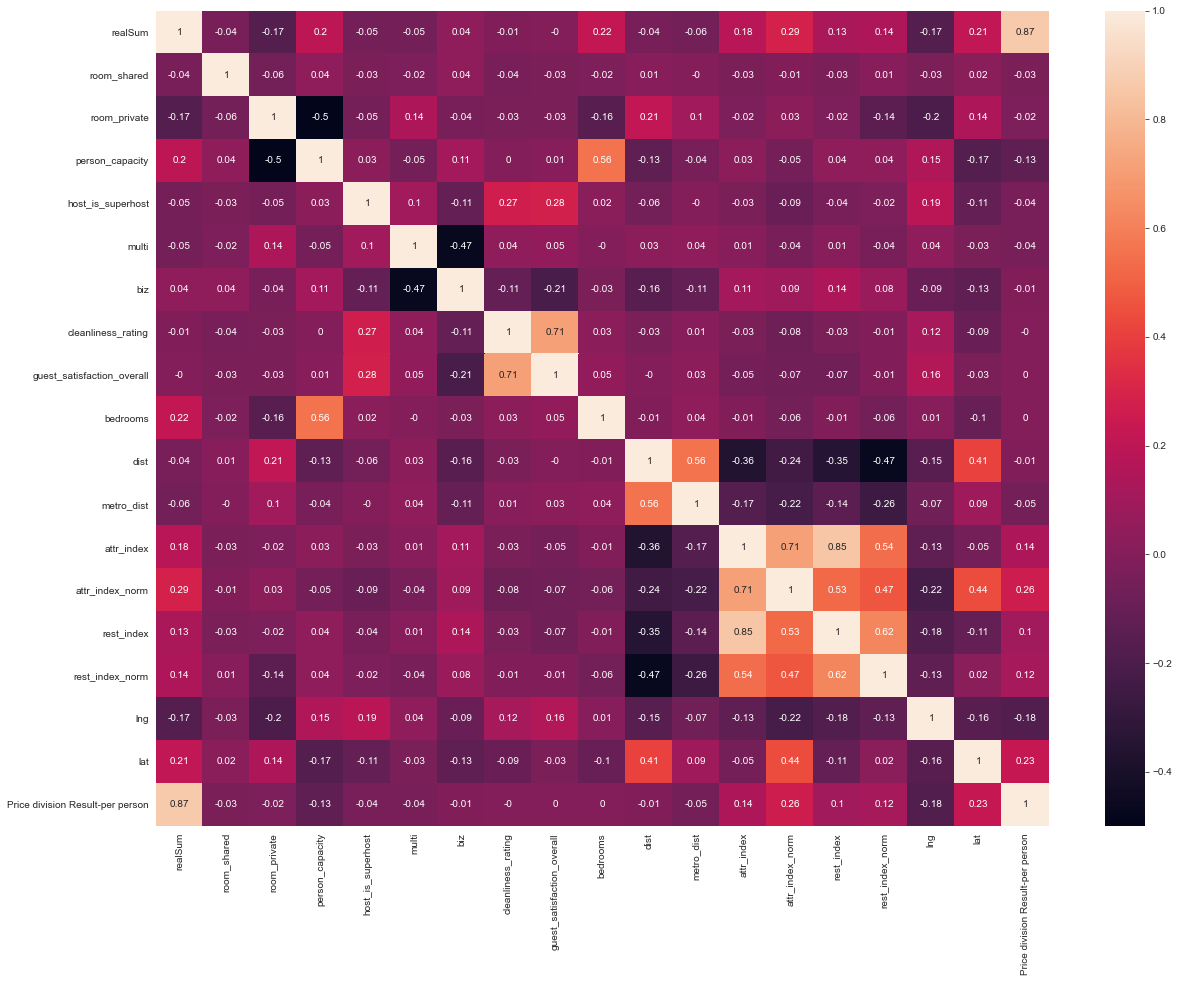

In [17]:
general_c_df = df.copy()
correlation_matrix_c_df = general_c_df.corr().round(2)
correlation_matrix_c_df
plt.figure(figsize=(20,15))
sns.heatmap(data=correlation_matrix_c_df, annot=True)
plt.show()

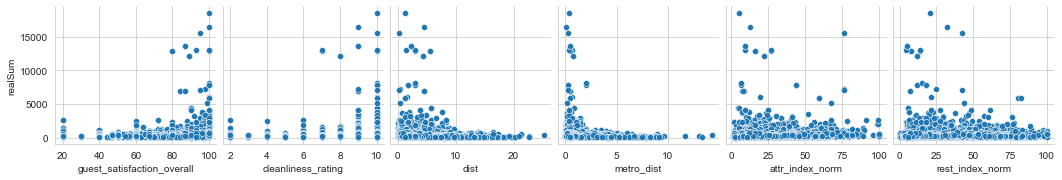

In [18]:
f = ['guest_satisfaction_overall','cleanliness_rating','dist','metro_dist','attr_index_norm','rest_index_norm']
sns.pairplot(general_c_df, x_vars=f, y_vars='realSum')
plt.show()

- According to the Heatmap above: the categories which effects the price of the apartment are:

  1. Dist from center 
  2. Cleaning_rating
  3. Guest_satisfaction_overall
  4. The amount of bedrooms
  5. Person capacity in the flat
  6. Room type

- Some featurs effects on the overall rating: 
  1. biz effects negative on the overall rating.
  2. cleaning rating and if the host is "super host" effect on the overall rating.

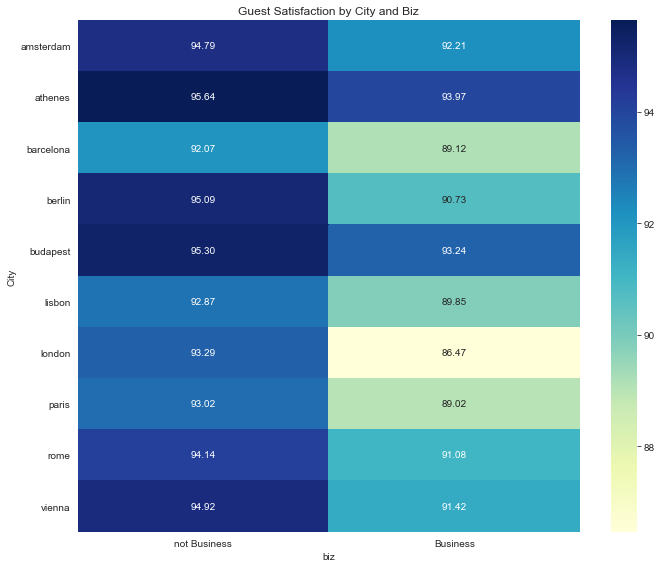

In [19]:
grouped_df = df.groupby(['city', 'biz'])['guest_satisfaction_overall'].mean().reset_index()
pivot_table = grouped_df.pivot(index='city', columns='biz', values='guest_satisfaction_overall')
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", cbar=True)
biz_labels = {0: 'not Business', 1: 'Business'}
heatmap.set_xticklabels([biz_labels[label] for label in pivot_table.columns])
plt.title('Guest Satisfaction by City and Biz')
plt.xlabel('biz')
plt.ylabel('City')
plt.yticks(rotation=360)
plt.tight_layout()
plt.show()

- If the apartment belongs to someone with more than 4 apartments, it is considered a business and receives a lower rating than the guests.Lets check why it is happene? 

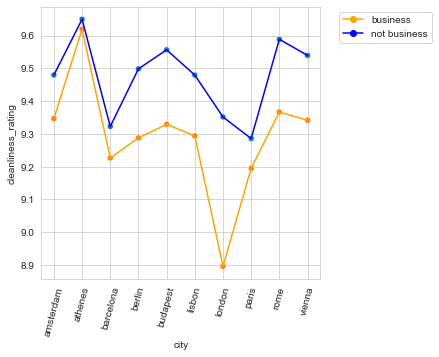

In [20]:
plt.figure(figsize=(5,5))
grouped_clean_df = df.groupby(['city', 'biz'])['cleanliness_rating'].mean().reset_index()
sns.scatterplot(data= grouped_clean_df ,x = 'city', y ='cleanliness_rating' ,hue='biz')
sns.lineplot(data=grouped_clean_df[grouped_clean_df['biz'] == 0], x='city', y='cleanliness_rating', color='blue')
sns.lineplot(data=grouped_clean_df[grouped_clean_df['biz'] == 1], x='city', y='cleanliness_rating', color='orange')
plt.legend().remove()
custom_legend = [plt.Line2D([], [], marker='o', color='orange', label='business'),
                 plt.Line2D([], [], marker='o', color='blue', label='not business')]
plt.legend(handles=custom_legend, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=75)
plt.show()

- From the plot you can see that the cleanliness rating of business apartments is lower than private apartments.
- lets will check the location of business apartments VS the location of private apartments:

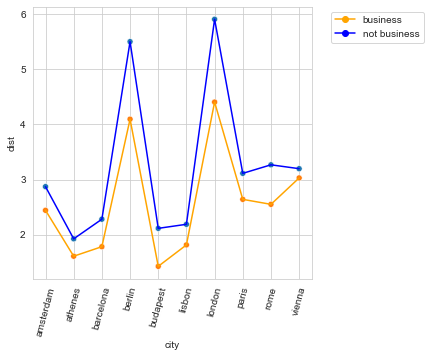

In [21]:
plt.figure(figsize=(5,5))
grouped_clean_df = df.groupby(['city', 'biz'])['dist'].mean().reset_index()
sns.scatterplot(data= grouped_clean_df ,x = 'city', y ='dist' ,hue='biz')
sns.lineplot(data=grouped_clean_df[grouped_clean_df['biz'] == 0], x='city', y='dist', color='blue')
sns.lineplot(data=grouped_clean_df[grouped_clean_df['biz'] == 1], x='city', y='dist', color='orange')
plt.legend().remove()
custom_legend = [plt.Line2D([], [], marker='o', color='orange', label='business'),
                 plt.Line2D([], [], marker='o', color='blue', label='not business')]
plt.legend(handles=custom_legend, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=75)
plt.show()

- we can see the business apartment are more close to the center from not business apartment. 
- Do apartments closer to the center receive a lower cleanliness rating?

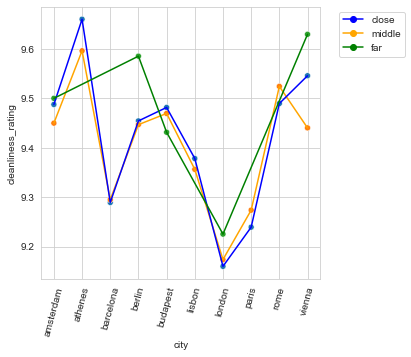

In [22]:
plt.figure(figsize=(5,5))
grouped_clean_df1 = df.groupby(['city', 'distance_category'])['cleanliness_rating'].mean().reset_index()
sns.scatterplot(data= grouped_clean_df1 ,x = 'city', y ='cleanliness_rating',hue='distance_category')
sns.lineplot(data=grouped_clean_df1[grouped_clean_df1['distance_category']=='middle'], x='city', y='cleanliness_rating', color='orange')
sns.lineplot(data=grouped_clean_df1[grouped_clean_df1['distance_category'] == 'close'], x='city', y='cleanliness_rating', color='blue')
sns.lineplot(data=grouped_clean_df1[grouped_clean_df1['distance_category'] == 'far'], x='city', y='cleanliness_rating', color='green')

custom_legend = [plt.Line2D([], [], marker='o', color='blue', label='close'),
                 plt.Line2D([], [], marker='o', color='orange', label='middle'),
                 plt.Line2D([], [], marker='o', color='green', label='far')]
plt.legend(handles=custom_legend, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=75)
plt.show()

- As you can see, the apartments that are closer to the center did not receive a lower cleanliness rating than those that are further away, therefore there is no connection between the distance of the apartment from the center and the cleanliness rating that you will receive from the guests
- From this it can be concluded that: business apartments invest less in cleaning and therefore their satisfaction rating is lower
- The satisfaction rating of the guests is only affected by the level of cleanliness of the apartment
- The less clean the apartment, the lower the satisfaction of the guests

## Conclusion 3 : 

The level of guest satisfaction is low when it comes to business. This is because the cleanliness rating of the businesses is lower than the rating of the private hosts

# Prediction!!!!

### 1. slicing into dataframes for each city:
- Each city needs to train its own model in oreder to predict the right price accourding to the city's prices range. 
- We took randomly brelin in order to decide which methode is better

In [23]:
berlin_df = (df[df.loc[:,'city']=='berlin']).copy().reset_index()

In [24]:
berlin_df1=pd.get_dummies(berlin_df)
berlin_df1.head(2)

,index,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,Price division Result-per person,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,day_weekday,day_weekend,city_berlin,distance_category_close,distance_category_middle,distance_category_far
0,10193,185.799757,False,True,2,True,0,0,10,98,...,92.899878,0,1,0,1,0,1,0,1,0
1,10194,194.914462,False,True,5,False,0,1,9,86,...,38.982892,0,1,0,1,0,1,0,1,0


### 2. thinking about the features which helps us to predict: 
- we will take the featurs we found earlier (from the heatmap) which effects the price: 
1. day 
2. person_capacity
3. dist_category
4. room_type
5. bedrooms
6. cleanliness_rating

## 3. Check which linear model is best for us to use:
- Note:
    1. The forecast itself varies between each city.
    2. The same features affect the price in a different way in each city, so in order to make it the most accurate we will use the same model and trust our data for each city separately according to the city that our client wants to predict.
    3. We took the same features and data characteristics with a random city to see which model is the best.
- The city we chose is Berlin.

### A. LinearRegression (works - on berlin):

In [25]:
label_encoder = LabelEncoder()
berlin_df['Encoded_dist_category'] = label_encoder.fit_transform(berlin_df['distance_category'])
berlin_df['Encoded_day'] = label_encoder.fit_transform(berlin_df['day'])
berlin_df['Encoded_room_type'] = label_encoder.fit_transform(berlin_df['room_type'])

In [26]:
features = ['Encoded_day','person_capacity','Encoded_dist_category','Encoded_room_type','bedrooms','cleanliness_rating']

X = berlin_df[features]
y = berlin_df['realSum']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=30)
model = LinearRegression()
model.fit(X_train,  y_train)
predictions = model.predict(X_test)

In [27]:
result = pd.DataFrame(columns=['RMSE','MAE','MAPE','R²'])
def model_result(actual,pred,model):
    rmse =  mean_squared_error(actual, pred, squared=False)
    mae = mean_absolute_error(actual, pred)
    mape = np.mean(np.abs((actual - pred) / actual)) * 100
    r2 = r2_score(actual,pred)
    result.loc[model] = {'RMSE':round(rmse,2),'MAE':round(mae,2),'MAPE':round(mape,2),'R²':round(r2,2)}

Linear_R = LinearRegression()
Linear_R_model = Linear_R.fit(X_train,y_train)
y_pred_Linear_R_model = Linear_R_model.predict(X_test)

model_result(y_test,y_pred_Linear_R_model,'LinearRegr')
result

,RMSE,MAE,MAPE,R²
LinearRegr,111.11,74.51,33.5,0.41


### B. DecisionTreeRegressor:

In [28]:
dtr = DecisionTreeRegressor()
dtr_model1 = dtr.fit(X_train,y_train)
y_pred_dtr_model1 = dtr_model1.predict(X_test)
model_result(y_test,y_pred_dtr_model1,'DecisionTree')
result

,RMSE,MAE,MAPE,R²
LinearRegr,111.11,74.51,33.50,0.41
DecisionTree,135.71,76.32,32.12,0.11


### C. RandomForestRegressor

In [29]:
rfr = RandomForestRegressor()
rfr_model1 = rfr.fit(X_train,y_train)
y_pred_rfr_model1 = rfr_model1.predict(X_test)
model_result(y_test,y_pred_rfr_model1,'RandomForest')
result

,RMSE,MAE,MAPE,R²
LinearRegr,111.11,74.51,33.50,0.41
DecisionTree,135.71,76.32,32.12,0.11
RandomForest,126.17,75.53,32.75,0.23


## The BETTER prediction model is Linear Regression! 
(it has the lowest values of RMSE , MAE ,MAPE and the R square is the closest to 1 which indicates on a better accuracy of all three).
### let's check the features importancy of the LinearRegression: 

In [30]:
importance = model.coef_
feature_names = X.columns
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_importance = scaler.fit_transform(importance.reshape(-1, 1))

feature_importance = pd.DataFrame({'Feature': feature_names, 'Normalized_importance': normalized_importance.flatten()}).sort_values('Normalized_importance' , ascending= False).reset_index()
feature_importance.drop('index',axis=1)

,Feature,Normalized_importance
0,bedrooms,1.000000
1,person_capacity,0.837416
2,Encoded_day,0.770657
3,cleanliness_rating,0.738318
4,Encoded_dist_category,0.526136
5,Encoded_room_type,0.000000


## Creating the questionnaire for prediction:

In [31]:
# Create question widgets and set their options 
question1A = widgets.Textarea(value='Ploni Almoni', placeholder='Enter your answer', description='')
question1B = widgets.DatePicker(description='',disabled=False)
question2 = widgets.Dropdown(options=['amsterdam','paris','london','barcelona','berlin','lisbon','vienna','rome','budapest','athenes'], description='')
question3 = widgets.Dropdown(options=[1,2,3,4,5,6])
question4 = widgets.RadioButtons(options=['weekday', 'weekend'], description='')
question5 = widgets.ToggleButtons(options=['close','middle','far'], description='')
question6 = widgets.SelectMultiple(options=['Entire home/apt','Private room','Shared room'],value = ['Private room'], description='',disabled=False)
question7 = widgets.Dropdown(options=[1,2,3,4,5,6,7,8,9,10], description='')
question8 = widgets.FloatSlider(value=0.0, min=0.0, max=10.0, step=0.1, description='')
question9 = widgets.FloatSlider(value=0.0, min=0.0, max=10.0, step=0.1, description='')
question10 = widgets.IntSlider(value=6, min=0, max=10, step=1, description='')

# Display the questions
display(widgets.Label('Enter your name')) 
display(question1A)
display(widgets.Label('Question 1: Choose your date'))
display(question1B)
display(widgets.Label('Question 2: Enter the city?'))
display(question2)
display(widgets.Label('Question 3: How many people?'))
display(question3)
display(widgets.Label('Question 4: Choose the time of the week?'))
display(question4)
display(widgets.Label('Question 5: Distance from center?'))
display(question5)
display(widgets.Label('Question 6: What type of room are you interested in?'))
display(question6)
display(widgets.Label('Question 7: The amount of bedrooms?'))
display(question7)
display(widgets.Label('Question 8: On a scale of 0 to 10, how important is proximity to attractions?'))
display(question8)
display(widgets.Label('Question 9: On a scale of 0 to 10, how important is proximity to resturants?'))
display(question9)
display(widgets.Label('Question 10: clean importance?'))
display(question10)

Label(value='Enter your name')

Textarea(value='Ploni Almoni', placeholder='Enter your answer')

Label(value='Question 1: Choose your date')

DatePicker(value=None)

Label(value='Question 2: Enter the city?')

Dropdown(options=('amsterdam', 'paris', 'london', 'barcelona', 'berlin', 'lisbon', 'vienna', 'rome', 'budapest…

Label(value='Question 3: How many people?')

Dropdown(options=(1, 2, 3, 4, 5, 6), value=1)

Label(value='Question 4: Choose the time of the week?')

RadioButtons(options=('weekday', 'weekend'), value='weekday')

Label(value='Question 5: Distance from center?')

ToggleButtons(options=('close', 'middle', 'far'), value='close')

Label(value='Question 6: What type of room are you interested in?')

SelectMultiple(index=(1,), options=('Entire home/apt', 'Private room', 'Shared room'), value=('Private room',)…

Label(value='Question 7: The amount of bedrooms?')

Dropdown(options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=1)

Label(value='Question 8: On a scale of 0 to 10, how important is proximity to attractions?')

FloatSlider(value=0.0, max=10.0)

Label(value='Question 9: On a scale of 0 to 10, how important is proximity to resturants?')

FloatSlider(value=0.0, max=10.0)

Label(value='Question 10: clean importance?')

IntSlider(value=6, max=10)

### PAY ATTENTION !
- If the characteristics of the apartment are not in the same city you have chosen 
  You will receive a notification about this in box number 33 and you will not be able to get a prediction about it.
- If you change the characteristics please run all the cells below again and NOT the questionnaire cell.

In [32]:
c_city = question2.value
my_df = (df[df.loc[:,'city']==c_city]).copy()
label_encoder = LabelEncoder()
my_df['Encoded_dist_category'] = label_encoder.fit_transform(my_df['distance_category'])
my_df['Encoded_day'] = label_encoder.fit_transform(my_df['day'])
my_df['Encoded_room_type'] = label_encoder.fit_transform(my_df['room_type'])

features = ['Encoded_day','person_capacity','Encoded_dist_category','Encoded_room_type','bedrooms','cleanliness_rating']

X4 = my_df[features]
y4 = my_df['realSum']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(X4_train,  y4_train)
predictions = model.predict(X4_test)

quiz_d = {'day': [question2.value],'person_capacity':[question3.value],'distance_category':[question5.value],'room_type':[question6.value[0]],'bedrooms':[question3.value],'cleanliness_rating':[question10.value]}
quiz_df = pd.DataFrame(data=quiz_d) #quiz_df
quiz_df['Encoded_dist_category'] = label_encoder.fit_transform(quiz_df['distance_category'])
quiz_df['Encoded_day'] = label_encoder.fit_transform(quiz_df['day'])
quiz_df['Encoded_room_type'] = label_encoder.fit_transform(quiz_df['room_type'])
X_Quiz= quiz_df[features]
Q_predicted_cost = model.predict(X_Quiz)
print("Predicted Cost:", round(Q_predicted_cost[0]),'euros')

Predicted Cost: 402 euros


In [33]:
value1 = float(Q_predicted_cost) +10 
value2 = float(Q_predicted_cost) -10 
for i in range(1):
    my_df1 = (my_df[my_df.loc[:,'realSum']>=value2]).copy()
    my_df1 = (my_df1[my_df1.loc[:,'realSum']<=value1])
    my_df1 = (my_df1[my_df1.loc[:,'distance_category']==question5.value])
    if len(my_df1.index) == 0 :
        print(f"there is no flat in the distance you chose, please choose another distance which is isn't {question5.value}") 
        break    
    my_df1 = (my_df1[my_df1.loc[:,'day']==question4.value])
    my_df1 = (my_df1[my_df1.loc[:,'room_type']==question6.value[0]])
    if len(my_df1.index) == 0 :
        print(f"there is no flat in the room_type you chose, please choose another room_type which isn't {question6.value[0]}")
        break
    else:
        num = len(my_df1.index)       
        random_number = random.randint(0, num-1)
        my_df1 = my_df1.iloc[[random_number]].copy()
        lat= my_df1['lat']
        lng = my_df1['lng'] 

In [34]:
apt1 = 'https://github.com/Greenlight5/EDA-project/blob/f97d0104a08da66f39e96e019166fc25afc52b9e/apt1.jpg?raw=true"'
apt2 = 'https://github.com/Greenlight5/EDA-project/blob/main/apt2.jpg?raw=true'
apt3 = 'https://github.com/Greenlight5/EDA-project/blob/main/apt3.jpg?raw=true'
apt4 = 'https://github.com/Greenlight5/EDA-project/blob/main/apt4.jpg?raw=true'
apt5 = 'https://github.com/Greenlight5/EDA-project/blob/main/apt5.jpg?raw=true'
apt6 = 'https://github.com/Greenlight5/EDA-project/blob/main/apt6.jpg?raw=true'
apt_list= [apt1,apt2,apt3,apt4,apt5,apt6]
num2 = len(apt_list)
apt_num = random.randint(0, num2-1)
image_path =apt_list[apt_num]
df_price = int(round(my_df1['realSum']))

In [35]:
df_price = int(round(my_df1['realSum']))
# Create a Folium map
map = folium.Map(location=[lat, lng], zoom_start=10, height=400)

folium.Marker(location=[lat, lng], popup= f'City:{c_city} Price:{df_price} euro Dist:{question5.value} Apt_type:{question6.value[0]}').add_to(map)
map.save('./map.html')

html_content = f'''
<div style="display:flex;, justify-content:center; align-items:center; ">
    <div style="flex: 1;">
        <iframe src="./map.html" width="99.5%" height="400px"></iframe>
    </div>
    <div style="flex: 1;">
        <img src="{image_path}" alt="Image" style="max-height: 400px;">
    </div>
</div>
'''

print(f'Hey {question1A.value}! the prediction is {round(Q_predicted_cost[0])} EUR and your apartment in {c_city} will cost {df_price} EUR and its location below:')
display(HTML(html_content))

Hey Ploni Almoni! the prediction is 402 EUR and your apartment in amsterdam will cost 403 EUR and its location below:
